In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

09/14/2018 13:25:05 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
09/14/2018 13:25:07 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
09/14/2018 13:25:08 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

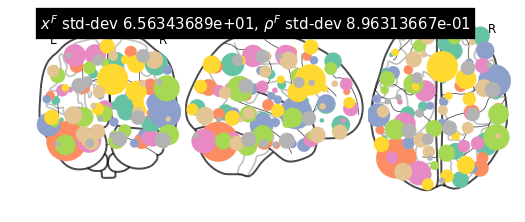

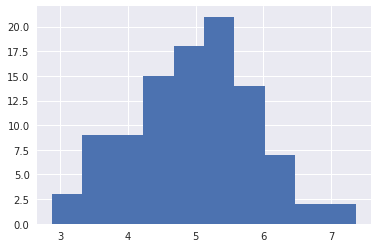

(<nilearn.plotting.displays.OrthoProjector at 0x7f3c6068a780>,
 tensor([[ -56.4026,  -53.1339,   43.2898],
         [   5.1299,    9.8033,    3.9818],
         [ -32.0707,  -26.3234,   -9.3077],
         [  18.2455,  -65.8270,   -2.6127],
         [  50.5247,  -58.3853,   48.0298],
         [ -55.3025,   17.3146,    9.4094],
         [  44.6671,   55.5426,  -15.3861],
         [ -49.1956,   35.5455,  -10.7796],
         [  23.5244,  -95.7804,    2.7550],
         [  60.8319,   -6.7016,   26.6104],
         [ -16.0827,  -18.6486,   37.7651],
         [  15.7445,   39.8589,    6.0130],
         [   8.4568,   47.2728,   51.4867],
         [   5.3561,  -12.4645,  -36.8729],
         [  23.6235,    2.9228,   60.6101],
         [ -44.1095,  -73.3640,  -33.2138],
         [  63.2808,  -21.1614,    5.4070],
         [ -33.2153,  -76.1607,   45.8942],
         [ -27.8338,   61.6702,   19.4879],
         [  44.3743,  -83.7547,   23.8038],
         [ -61.0860,  -43.3206,   14.7511],
         [ -2

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=300, use_cuda=True, blocks_batch_size=8, patience=50)

09/14/2018 13:26:56 [Epoch 1] (862ms) Posterior free-energy 1.66772768e+08 = KL from prior 1.74362891e+05 - log-likelihood -1.66598400e+08
09/14/2018 13:26:57 [Epoch 2] (765ms) Posterior free-energy 1.65221008e+08 = KL from prior 1.73330703e+05 - log-likelihood -1.65047680e+08
09/14/2018 13:26:58 [Epoch 3] (766ms) Posterior free-energy 1.68549968e+08 = KL from prior 1.73661500e+05 - log-likelihood -1.68376304e+08
09/14/2018 13:26:59 [Epoch 4] (765ms) Posterior free-energy 1.44429408e+08 = KL from prior 1.73855922e+05 - log-likelihood -1.44255552e+08
09/14/2018 13:26:59 [Epoch 5] (770ms) Posterior free-energy 1.42313488e+08 = KL from prior 1.73629922e+05 - log-likelihood -1.42139856e+08
09/14/2018 13:27:00 [Epoch 6] (785ms) Posterior free-energy 1.31666888e+08 = KL from prior 1.74486047e+05 - log-likelihood -1.31492400e+08
09/14/2018 13:27:01 [Epoch 7] (770ms) Posterior free-energy 1.33517152e+08 = KL from prior 1.75584094e+05 - log-likelihood -1.33341568e+08
09/14/2018 13:27:02 [Epoch 

Epoch  1047: reducing learning rate of group 0 to 5.0000e-02.


09/14/2018 13:41:07 [Epoch 1049] (792ms) Posterior free-energy 9.74942000e+07 = KL from prior 4.63369500e+05 - log-likelihood -9.70308320e+07
09/14/2018 13:41:08 [Epoch 1050] (758ms) Posterior free-energy 9.74593600e+07 = KL from prior 4.63243219e+05 - log-likelihood -9.69961200e+07
09/14/2018 13:41:09 [Epoch 1051] (762ms) Posterior free-energy 9.74272240e+07 = KL from prior 4.63330656e+05 - log-likelihood -9.69638960e+07
09/14/2018 13:41:10 [Epoch 1052] (762ms) Posterior free-energy 9.74397680e+07 = KL from prior 4.63104125e+05 - log-likelihood -9.69766640e+07
09/14/2018 13:41:10 [Epoch 1053] (767ms) Posterior free-energy 9.74663440e+07 = KL from prior 4.63498500e+05 - log-likelihood -9.70028480e+07
09/14/2018 13:41:11 [Epoch 1054] (762ms) Posterior free-energy 9.74583600e+07 = KL from prior 4.63520875e+05 - log-likelihood -9.69948400e+07
09/14/2018 13:41:12 [Epoch 1055] (769ms) Posterior free-energy 9.74694000e+07 = KL from prior 4.63329188e+05 - log-likelihood -9.70060720e+07
09/14/

Epoch  1167: reducing learning rate of group 0 to 2.5000e-02.


09/14/2018 13:42:42 [Epoch 1169] (789ms) Posterior free-energy 9.73877360e+07 = KL from prior 4.65355188e+05 - log-likelihood -9.69223840e+07
09/14/2018 13:42:43 [Epoch 1170] (816ms) Posterior free-energy 9.73928240e+07 = KL from prior 4.65403375e+05 - log-likelihood -9.69274240e+07
09/14/2018 13:42:44 [Epoch 1171] (798ms) Posterior free-energy 9.74004080e+07 = KL from prior 4.65314812e+05 - log-likelihood -9.69350960e+07
09/14/2018 13:42:44 [Epoch 1172] (769ms) Posterior free-energy 9.73794240e+07 = KL from prior 4.65602125e+05 - log-likelihood -9.69138240e+07
09/14/2018 13:42:45 [Epoch 1173] (781ms) Posterior free-energy 9.73827280e+07 = KL from prior 4.65530750e+05 - log-likelihood -9.69172000e+07
09/14/2018 13:42:46 [Epoch 1174] (806ms) Posterior free-energy 9.73951760e+07 = KL from prior 4.65490125e+05 - log-likelihood -9.69296880e+07
09/14/2018 13:42:47 [Epoch 1175] (778ms) Posterior free-energy 9.73812640e+07 = KL from prior 4.65207062e+05 - log-likelihood -9.69160560e+07
09/14/

Epoch  1237: reducing learning rate of group 0 to 1.2500e-02.


09/14/2018 13:43:38 [Epoch 1239] (781ms) Posterior free-energy 9.73694720e+07 = KL from prior 4.65920062e+05 - log-likelihood -9.69035520e+07
09/14/2018 13:43:38 [Epoch 1240] (769ms) Posterior free-energy 9.73678240e+07 = KL from prior 4.65997875e+05 - log-likelihood -9.69018240e+07
09/14/2018 13:43:39 [Epoch 1241] (786ms) Posterior free-energy 9.73577920e+07 = KL from prior 4.65951312e+05 - log-likelihood -9.68918400e+07
09/14/2018 13:43:40 [Epoch 1242] (778ms) Posterior free-energy 9.73812640e+07 = KL from prior 4.65837750e+05 - log-likelihood -9.69154240e+07
09/14/2018 13:43:41 [Epoch 1243] (772ms) Posterior free-energy 9.73678080e+07 = KL from prior 4.65785406e+05 - log-likelihood -9.69020240e+07
09/14/2018 13:43:41 [Epoch 1244] (807ms) Posterior free-energy 9.73565520e+07 = KL from prior 4.65924125e+05 - log-likelihood -9.68906240e+07
09/14/2018 13:43:42 [Epoch 1245] (812ms) Posterior free-energy 9.73682560e+07 = KL from prior 4.66113125e+05 - log-likelihood -9.69021440e+07
09/14/

Epoch  1303: reducing learning rate of group 0 to 6.2500e-03.


09/14/2018 13:44:29 [Epoch 1305] (776ms) Posterior free-energy 9.73533440e+07 = KL from prior 4.66066250e+05 - log-likelihood -9.68872800e+07
09/14/2018 13:44:30 [Epoch 1306] (806ms) Posterior free-energy 9.73531760e+07 = KL from prior 4.66027906e+05 - log-likelihood -9.68871520e+07
09/14/2018 13:44:31 [Epoch 1307] (843ms) Posterior free-energy 9.73446800e+07 = KL from prior 4.66505562e+05 - log-likelihood -9.68781760e+07
09/14/2018 13:44:32 [Epoch 1308] (817ms) Posterior free-energy 9.73665840e+07 = KL from prior 4.66116406e+05 - log-likelihood -9.69004640e+07
09/14/2018 13:44:32 [Epoch 1309] (766ms) Posterior free-energy 9.73572640e+07 = KL from prior 4.66467781e+05 - log-likelihood -9.68908000e+07
09/14/2018 13:44:33 [Epoch 1310] (785ms) Posterior free-energy 9.73531440e+07 = KL from prior 4.66555812e+05 - log-likelihood -9.68865920e+07
09/14/2018 13:44:34 [Epoch 1311] (770ms) Posterior free-energy 9.73442160e+07 = KL from prior 4.65994312e+05 - log-likelihood -9.68782240e+07
09/14/

Epoch  1369: reducing learning rate of group 0 to 3.1250e-03.


09/14/2018 13:45:21 [Epoch 1371] (781ms) Posterior free-energy 9.73474720e+07 = KL from prior 4.66275719e+05 - log-likelihood -9.68812000e+07
09/14/2018 13:45:21 [Epoch 1372] (783ms) Posterior free-energy 9.73510960e+07 = KL from prior 4.66138375e+05 - log-likelihood -9.68849600e+07
09/14/2018 13:45:22 [Epoch 1373] (774ms) Posterior free-energy 9.73457440e+07 = KL from prior 4.66383188e+05 - log-likelihood -9.68793600e+07
09/14/2018 13:45:23 [Epoch 1374] (765ms) Posterior free-energy 9.73442160e+07 = KL from prior 4.66371875e+05 - log-likelihood -9.68778480e+07
09/14/2018 13:45:24 [Epoch 1375] (776ms) Posterior free-energy 9.73430320e+07 = KL from prior 4.66452875e+05 - log-likelihood -9.68765760e+07
09/14/2018 13:45:25 [Epoch 1376] (784ms) Posterior free-energy 9.73522960e+07 = KL from prior 4.66189688e+05 - log-likelihood -9.68861040e+07
09/14/2018 13:45:25 [Epoch 1377] (786ms) Posterior free-energy 9.73440320e+07 = KL from prior 4.66340125e+05 - log-likelihood -9.68776880e+07
09/14/

Epoch  1449: reducing learning rate of group 0 to 1.5625e-03.


09/14/2018 13:46:26 [Epoch 1451] (833ms) Posterior free-energy 9.73456480e+07 = KL from prior 4.66314500e+05 - log-likelihood -9.68793360e+07
09/14/2018 13:46:26 [Epoch 1452] (844ms) Posterior free-energy 9.73405360e+07 = KL from prior 4.66708188e+05 - log-likelihood -9.68738240e+07
09/14/2018 13:46:27 [Epoch 1453] (823ms) Posterior free-energy 9.73570400e+07 = KL from prior 4.66670781e+05 - log-likelihood -9.68903680e+07
09/14/2018 13:46:28 [Epoch 1454] (820ms) Posterior free-energy 9.73569200e+07 = KL from prior 4.66470500e+05 - log-likelihood -9.68904480e+07
09/14/2018 13:46:29 [Epoch 1455] (831ms) Posterior free-energy 9.73483440e+07 = KL from prior 4.66246688e+05 - log-likelihood -9.68820960e+07
09/14/2018 13:46:30 [Epoch 1456] (785ms) Posterior free-energy 9.73426800e+07 = KL from prior 4.66384094e+05 - log-likelihood -9.68762960e+07
09/14/2018 13:46:31 [Epoch 1457] (816ms) Posterior free-energy 9.73365440e+07 = KL from prior 4.66431594e+05 - log-likelihood -9.68701120e+07
09/14/

Epoch  1500: reducing learning rate of group 0 to 7.8125e-04.


09/14/2018 13:47:06 [Epoch 1502] (783ms) Posterior free-energy 9.73390160e+07 = KL from prior 4.66394250e+05 - log-likelihood -9.68726240e+07
09/14/2018 13:47:07 [Epoch 1503] (765ms) Posterior free-energy 9.73496400e+07 = KL from prior 4.66439938e+05 - log-likelihood -9.68832000e+07
09/14/2018 13:47:08 [Epoch 1504] (793ms) Posterior free-energy 9.73395280e+07 = KL from prior 4.66758312e+05 - log-likelihood -9.68727680e+07
09/14/2018 13:47:09 [Epoch 1505] (841ms) Posterior free-energy 9.73374400e+07 = KL from prior 4.66205250e+05 - log-likelihood -9.68712320e+07
09/14/2018 13:47:10 [Epoch 1506] (803ms) Posterior free-energy 9.73494480e+07 = KL from prior 4.66367219e+05 - log-likelihood -9.68830800e+07
09/14/2018 13:47:10 [Epoch 1507] (800ms) Posterior free-energy 9.73508320e+07 = KL from prior 4.66577062e+05 - log-likelihood -9.68842560e+07
09/14/2018 13:47:11 [Epoch 1508] (799ms) Posterior free-energy 9.73365680e+07 = KL from prior 4.66297719e+05 - log-likelihood -9.68702720e+07
09/14/

Epoch  1551: reducing learning rate of group 0 to 3.9063e-04.


09/14/2018 13:47:47 [Epoch 1553] (898ms) Posterior free-energy 9.73372240e+07 = KL from prior 4.66622500e+05 - log-likelihood -9.68706000e+07
09/14/2018 13:47:48 [Epoch 1554] (874ms) Posterior free-energy 9.73659040e+07 = KL from prior 4.66784094e+05 - log-likelihood -9.68991200e+07
09/14/2018 13:47:49 [Epoch 1555] (830ms) Posterior free-energy 9.73406800e+07 = KL from prior 4.66375219e+05 - log-likelihood -9.68743040e+07
09/14/2018 13:47:50 [Epoch 1556] (780ms) Posterior free-energy 9.73394480e+07 = KL from prior 4.66354438e+05 - log-likelihood -9.68730960e+07
09/14/2018 13:47:51 [Epoch 1557] (789ms) Posterior free-energy 9.73463840e+07 = KL from prior 4.66478188e+05 - log-likelihood -9.68799040e+07
09/14/2018 13:47:51 [Epoch 1558] (797ms) Posterior free-energy 9.73391040e+07 = KL from prior 4.66569938e+05 - log-likelihood -9.68725360e+07
09/14/2018 13:47:52 [Epoch 1559] (835ms) Posterior free-energy 9.73385440e+07 = KL from prior 4.66328594e+05 - log-likelihood -9.68722160e+07
09/14/

Epoch  1602: reducing learning rate of group 0 to 1.9531e-04.


09/14/2018 13:48:28 [Epoch 1604] (786ms) Posterior free-energy 9.73374640e+07 = KL from prior 4.66410625e+05 - log-likelihood -9.68710560e+07
09/14/2018 13:48:29 [Epoch 1605] (777ms) Posterior free-energy 9.73475200e+07 = KL from prior 4.66305000e+05 - log-likelihood -9.68812160e+07
09/14/2018 13:48:29 [Epoch 1606] (771ms) Posterior free-energy 9.73354160e+07 = KL from prior 4.66566812e+05 - log-likelihood -9.68688480e+07
09/14/2018 13:48:30 [Epoch 1607] (778ms) Posterior free-energy 9.73382960e+07 = KL from prior 4.66442781e+05 - log-likelihood -9.68718560e+07
09/14/2018 13:48:31 [Epoch 1608] (775ms) Posterior free-energy 9.73383120e+07 = KL from prior 4.66448500e+05 - log-likelihood -9.68718640e+07
09/14/2018 13:48:32 [Epoch 1609] (786ms) Posterior free-energy 9.73376800e+07 = KL from prior 4.66562688e+05 - log-likelihood -9.68711200e+07
09/14/2018 13:48:32 [Epoch 1610] (772ms) Posterior free-energy 9.73419040e+07 = KL from prior 4.66430688e+05 - log-likelihood -9.68754720e+07
09/14/

Epoch  1653: reducing learning rate of group 0 to 9.7656e-05.


09/14/2018 13:49:07 [Epoch 1655] (780ms) Posterior free-energy 9.73545200e+07 = KL from prior 4.66740969e+05 - log-likelihood -9.68877760e+07
09/14/2018 13:49:08 [Epoch 1656] (772ms) Posterior free-energy 9.73629520e+07 = KL from prior 4.66472812e+05 - log-likelihood -9.68964800e+07
09/14/2018 13:49:09 [Epoch 1657] (769ms) Posterior free-energy 9.73474160e+07 = KL from prior 4.66363094e+05 - log-likelihood -9.68810560e+07
09/14/2018 13:49:10 [Epoch 1658] (769ms) Posterior free-energy 9.73454400e+07 = KL from prior 4.66175969e+05 - log-likelihood -9.68792640e+07
09/14/2018 13:49:11 [Epoch 1659] (779ms) Posterior free-energy 9.73385520e+07 = KL from prior 4.66229969e+05 - log-likelihood -9.68723200e+07
09/14/2018 13:49:11 [Epoch 1660] (776ms) Posterior free-energy 9.73477760e+07 = KL from prior 4.66543094e+05 - log-likelihood -9.68812320e+07
09/14/2018 13:49:12 [Epoch 1661] (779ms) Posterior free-energy 9.73498960e+07 = KL from prior 4.66417406e+05 - log-likelihood -9.68834800e+07
09/14/

Epoch  1704: reducing learning rate of group 0 to 4.8828e-05.


09/14/2018 13:49:47 [Epoch 1706] (791ms) Posterior free-energy 9.73411280e+07 = KL from prior 4.66788625e+05 - log-likelihood -9.68743360e+07
09/14/2018 13:49:48 [Epoch 1707] (781ms) Posterior free-energy 9.73441520e+07 = KL from prior 4.66300250e+05 - log-likelihood -9.68778480e+07
09/14/2018 13:49:49 [Epoch 1708] (811ms) Posterior free-energy 9.73368640e+07 = KL from prior 4.66651625e+05 - log-likelihood -9.68702160e+07
09/14/2018 13:49:50 [Epoch 1709] (848ms) Posterior free-energy 9.73362880e+07 = KL from prior 4.66319000e+05 - log-likelihood -9.68699680e+07
09/14/2018 13:49:50 [Epoch 1710] (782ms) Posterior free-energy 9.73284000e+07 = KL from prior 4.66044188e+05 - log-likelihood -9.68623520e+07
09/14/2018 13:49:51 [Epoch 1711] (798ms) Posterior free-energy 9.73426480e+07 = KL from prior 4.66664812e+05 - log-likelihood -9.68759840e+07
09/14/2018 13:49:52 [Epoch 1712] (790ms) Posterior free-energy 9.73311120e+07 = KL from prior 4.66334562e+05 - log-likelihood -9.68647760e+07
09/14/

Epoch  1755: reducing learning rate of group 0 to 2.4414e-05.


09/14/2018 13:50:28 [Epoch 1757] (809ms) Posterior free-energy 9.73536320e+07 = KL from prior 4.66643562e+05 - log-likelihood -9.68869920e+07
09/14/2018 13:50:28 [Epoch 1758] (821ms) Posterior free-energy 9.73374000e+07 = KL from prior 4.66529562e+05 - log-likelihood -9.68708720e+07
09/14/2018 13:50:29 [Epoch 1759] (781ms) Posterior free-energy 9.73580320e+07 = KL from prior 4.66379875e+05 - log-likelihood -9.68916560e+07
09/14/2018 13:50:30 [Epoch 1760] (775ms) Posterior free-energy 9.73542400e+07 = KL from prior 4.66562000e+05 - log-likelihood -9.68876800e+07
09/14/2018 13:50:31 [Epoch 1761] (798ms) Posterior free-energy 9.73326160e+07 = KL from prior 4.66472125e+05 - log-likelihood -9.68661440e+07
09/14/2018 13:50:31 [Epoch 1762] (782ms) Posterior free-energy 9.73373600e+07 = KL from prior 4.66764781e+05 - log-likelihood -9.68705920e+07
09/14/2018 13:50:32 [Epoch 1763] (786ms) Posterior free-energy 9.73431920e+07 = KL from prior 4.66439281e+05 - log-likelihood -9.68767520e+07
09/14/

Epoch  1806: reducing learning rate of group 0 to 1.2207e-05.


09/14/2018 13:51:09 [Epoch 1808] (800ms) Posterior free-energy 9.73372400e+07 = KL from prior 4.66707344e+05 - log-likelihood -9.68705360e+07
09/14/2018 13:51:09 [Epoch 1809] (787ms) Posterior free-energy 9.73312400e+07 = KL from prior 4.66563219e+05 - log-likelihood -9.68646800e+07
09/14/2018 13:51:10 [Epoch 1810] (788ms) Posterior free-energy 9.73461200e+07 = KL from prior 4.66150219e+05 - log-likelihood -9.68799680e+07
09/14/2018 13:51:11 [Epoch 1811] (795ms) Posterior free-energy 9.73381680e+07 = KL from prior 4.66421938e+05 - log-likelihood -9.68717440e+07
09/14/2018 13:51:12 [Epoch 1812] (859ms) Posterior free-energy 9.73438320e+07 = KL from prior 4.66669156e+05 - log-likelihood -9.68771600e+07
09/14/2018 13:51:13 [Epoch 1813] (782ms) Posterior free-energy 9.73504160e+07 = KL from prior 4.66640312e+05 - log-likelihood -9.68837760e+07
09/14/2018 13:51:13 [Epoch 1814] (783ms) Posterior free-energy 9.73452400e+07 = KL from prior 4.66391188e+05 - log-likelihood -9.68788480e+07
09/14/

Epoch  1857: reducing learning rate of group 0 to 1.0000e-05.


09/14/2018 13:51:50 [Epoch 1859] (865ms) Posterior free-energy 9.73546080e+07 = KL from prior 4.66534469e+05 - log-likelihood -9.68880720e+07
09/14/2018 13:51:51 [Epoch 1860] (871ms) Posterior free-energy 9.73522480e+07 = KL from prior 4.66439312e+05 - log-likelihood -9.68858080e+07
09/14/2018 13:51:51 [Epoch 1861] (844ms) Posterior free-energy 9.73470000e+07 = KL from prior 4.66199812e+05 - log-likelihood -9.68808000e+07
09/14/2018 13:51:52 [Epoch 1862] (782ms) Posterior free-energy 9.73376000e+07 = KL from prior 4.66290000e+05 - log-likelihood -9.68713120e+07
09/14/2018 13:51:53 [Epoch 1863] (806ms) Posterior free-energy 9.73427280e+07 = KL from prior 4.66569906e+05 - log-likelihood -9.68761600e+07
09/14/2018 13:51:54 [Epoch 1864] (832ms) Posterior free-energy 9.73563520e+07 = KL from prior 4.66255188e+05 - log-likelihood -9.68900960e+07
09/14/2018 13:51:55 [Epoch 1865] (810ms) Posterior free-energy 9.73550720e+07 = KL from prior 4.66559781e+05 - log-likelihood -9.68885120e+07
09/14/

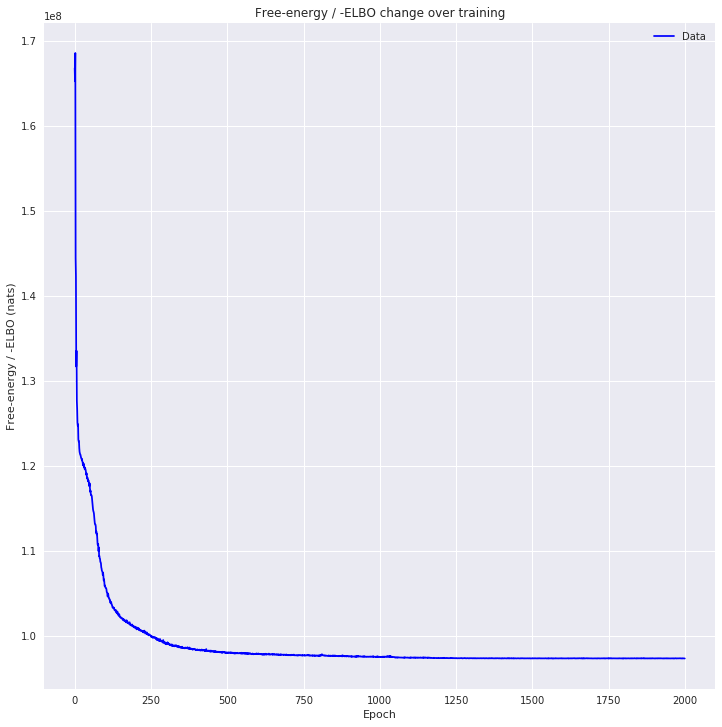

In [9]:
utils.plot_losses(losses)

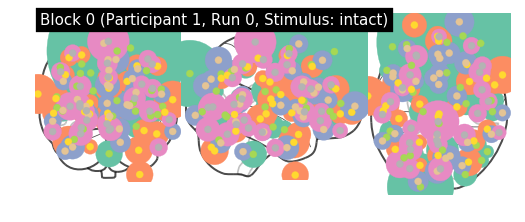

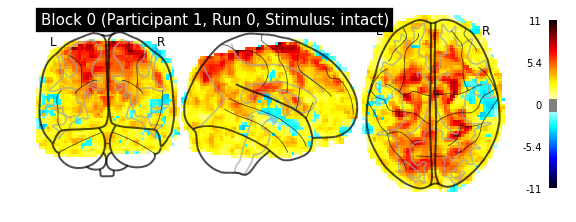

09/14/2018 13:54:10 Reconstruction Error (Frobenius Norm): 4.12877393e+03 out of 5.08479883e+03


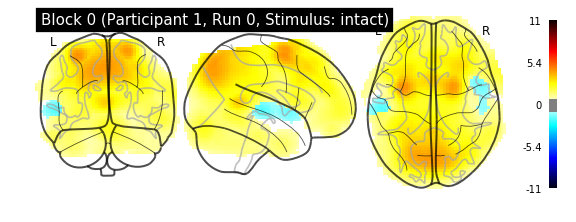

{'weights': tensor([[ 1.1505e+00,  4.6907e+00,  2.1228e-02,  ..., -2.3876e-01,
         -3.9044e-01,  9.4014e-01],
        [ 3.4552e-01,  2.9312e+00,  8.2861e-01,  ...,  1.3581e+00,
          7.2662e-01,  1.7961e+00],
        [ 1.1224e+00,  5.7284e-01,  1.9415e-01,  ...,  2.6165e+00,
          2.1364e+00,  1.3517e+00],
        ...,
        [ 1.1617e+00,  2.1701e-01, -1.0402e+00,  ..., -4.4673e+00,
         -2.6141e+00, -1.6673e-01],
        [ 2.3116e+00, -9.7811e-01, -8.3378e-02,  ..., -5.2644e+00,
         -1.6049e+00, -5.6227e-01],
        [ 3.0126e+00, -1.5280e+00,  1.9027e-01,  ..., -6.1047e+00,
         -1.4403e+00, -1.6306e-02]]), 'factors': tensor([[ 0.0046,  0.0021,  0.0027,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

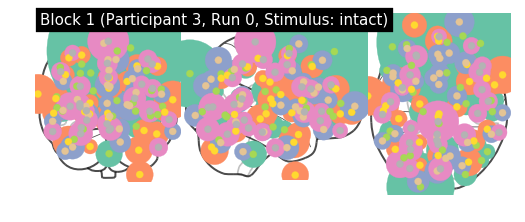

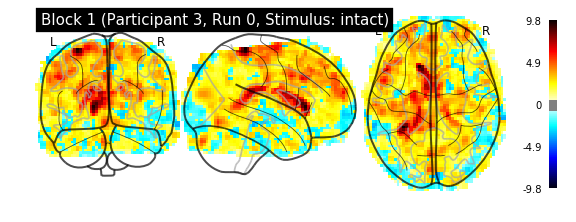

09/14/2018 13:54:39 Reconstruction Error (Frobenius Norm): 4.29028906e+03 out of 5.19534326e+03


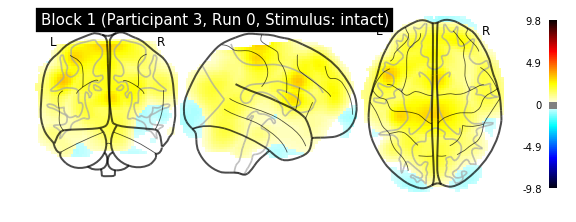

{'weights': tensor([[-1.5008e+00,  6.0477e+00,  5.6644e-02,  ..., -2.1295e-01,
          6.4723e-01, -1.2816e+00],
        [-3.0290e+00,  1.5419e+00, -4.4571e-01,  ..., -2.4563e-01,
          1.3598e-01, -2.3776e-01],
        [-1.7352e+00,  4.5236e-01, -9.4047e-01,  ...,  4.8432e-02,
          2.0348e+00,  1.9501e-02],
        ...,
        [ 2.1736e+00, -1.5510e+00,  4.9835e-01,  ..., -2.5368e+00,
         -8.4857e-01, -1.4434e+00],
        [ 2.0128e+00, -2.4354e+00,  2.3208e-01,  ..., -2.4683e+00,
         -1.3006e+00, -1.6322e+00],
        [ 1.6751e+00, -2.0889e+00, -1.2269e+00,  ..., -3.8677e+00,
         -2.3430e+00, -1.6463e+00]]), 'factors': tensor([[ 0.0041,  0.0019,  0.0024,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

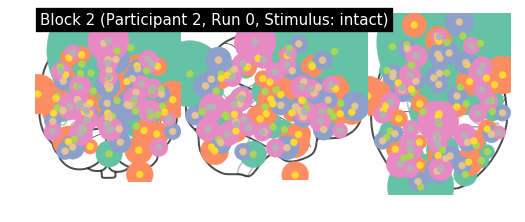

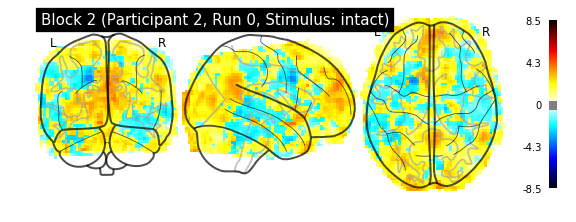

09/14/2018 13:55:06 Reconstruction Error (Frobenius Norm): 4.00979810e+03 out of 5.19534229e+03


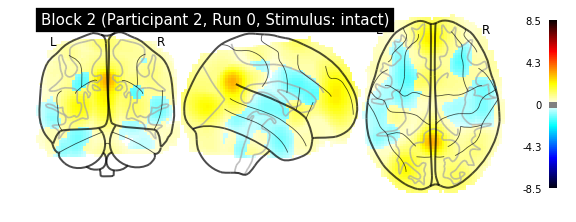

{'weights': tensor([[-1.3508e+00,  2.7134e-01, -7.8780e-01,  ...,  2.9766e-01,
          1.9590e+00, -2.1029e+00],
        [-6.2120e-01, -4.7885e-01,  5.7060e-02,  ..., -1.5692e+00,
         -7.6137e-01, -4.9919e-01],
        [ 3.7293e-01, -1.6157e+00, -6.6103e-01,  ..., -5.8292e-01,
         -1.9834e+00, -2.5119e-01],
        ...,
        [ 1.1675e+00, -7.3427e-01,  7.9471e-01,  ..., -1.0222e+00,
         -2.0957e+00,  3.5245e-01],
        [-1.7137e-01, -1.1326e+00,  1.5503e-01,  ...,  8.7814e-01,
         -1.2173e-01, -9.4500e-01],
        [-1.9244e-01, -1.4402e+00,  7.6690e-01,  ...,  6.8883e-01,
         -1.3373e+00, -1.0182e+00]]), 'factors': tensor([[ 0.0043,  0.0020,  0.0026,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


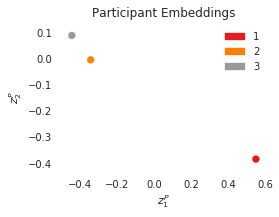

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


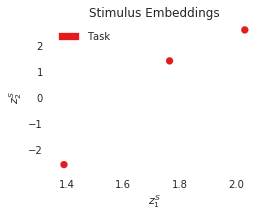

In [13]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

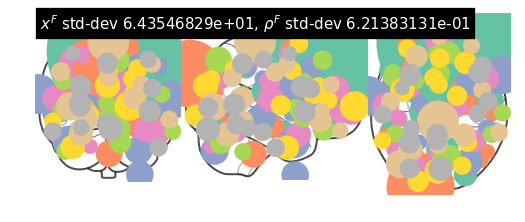

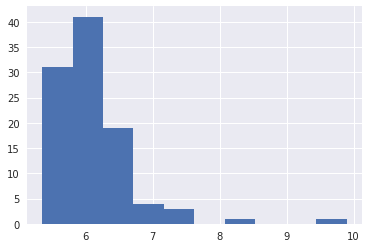

(<nilearn.plotting.displays.OrthoProjector at 0x7f3c2a6e72b0>,
 tensor([[ -50.3361,  -44.7121,   44.3082],
         [   9.1315,   16.6355,    9.4185],
         [ -26.4212,   -3.7923,  -20.6422],
         [   4.5046,  -64.6004,   -6.9783],
         [  40.1257,  -59.6099,   40.8794],
         [ -53.8525,   19.1509,    1.9473],
         [  44.6924,   47.5479,   -6.5815],
         [ -48.1131,   44.0006,   -1.4852],
         [  28.7281,  -90.3508,   -1.7053],
         [  55.6596,  -12.5838,   21.3627],
         [ -15.8355,  -24.1642,   19.5161],
         [  26.1105,   55.3544,    6.9911],
         [   9.3728,   48.7245,   61.5073],
         [   0.8729,  -36.7683,  -46.4815],
         [  23.4216,    1.3355,   64.9573],
         [ -35.8596,  -72.8590,  -31.4093],
         [  56.8561,  -24.2618,    3.3199],
         [ -29.3010,  -70.4879,   38.0558],
         [ -33.1415,   46.2555,   24.5091],
         [  45.6545,  -75.5993,   20.0464],
         [ -54.1534,  -51.1385,   13.5059],
         [ -1

In [14]:
dtfa.visualize_factor_embedding()

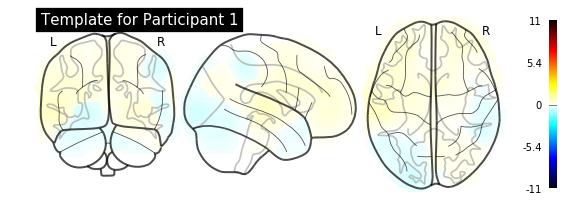

In [15]:
dtfa.plot_subject_template(1)

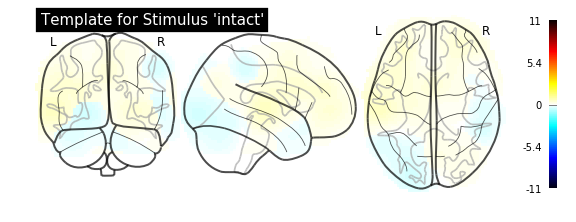

In [16]:
dtfa.plot_task_template('intact')